In [2]:
!pip install pip install yfinance

ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install


In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [21]:
warnings.filterwarnings("ignore")

In [4]:
df = yf.download("NVDA", start = "2023-01-01", end = "2024-01-01")

[*********************100%%**********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,14.851,14.996,14.096,14.315,14.306806,401277000
2023-01-04,14.567,14.853,14.241,14.749,14.740556,431324000
2023-01-05,14.491,14.564,14.148,14.265,14.256833,389168000
2023-01-06,14.474,15.010,14.034,14.859,14.850494,405044000
2023-01-09,15.284,16.056,15.141,15.628,15.619053,504231000


In [6]:
df.shape

(250, 6)

In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,49.195000,49.382999,48.466999,48.830002,48.823704,252507000
2023-12-26,48.967999,49.599998,48.959999,49.278999,49.272640,244200000
2023-12-27,49.511002,49.680000,49.084999,49.417000,49.410622,233648000
2023-12-28,49.643002,49.883999,49.411999,49.521999,49.515610,246587000
2023-12-29,49.813000,49.997002,48.750999,49.521999,49.515610,389293000


In [8]:
# Bilimsel notasyonu kapatmak için
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Veri özetini yazdır
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,250.00,36.52,10.85,14.47,26.83,41.64,45.77,50.22
High,250.00,37.12,10.92,14.56,27.17,42.50,46.22,50.55
Low,250.00,35.93,10.66,14.03,26.43,40.96,44.99,49.41
Close,250.00,36.57,10.76,14.27,26.90,41.89,45.65,50.41
Adj Close,250.00,36.56,10.76,14.26,26.89,41.88,45.63,50.40
Volume,250.00,473557460.00,161402819.49,198209000.00,379023750.00,434184500.00,517265250.00,1543911000.00


In [19]:
kapanis_deg = df["Close"]

In [20]:
kapanis_deg.head()

Date
2023-01-03   14.31
2023-01-04   14.75
2023-01-05   14.27
2023-01-06   14.86
2023-01-09   15.63
Name: Close, dtype: float64

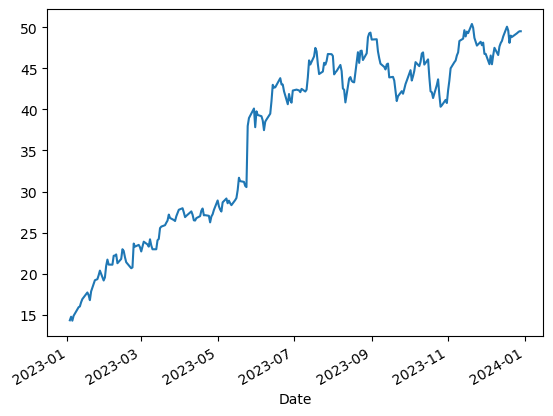

In [22]:
### Bu değeri görselleştirelim.

kapanis_deg.plot();

Zaman değişkeinin zaman olduğunu tanımlamamız gerekmektedir.

In [24]:
kapanis_deg.index

# Bu örnekte datetime formatında bu örnek için gerek yok ama genelde zaman serileri datetime olarak tanımlı olmuyor.

DatetimeIndex(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [26]:
# Zaman serilerindeki bu kapanış işlemi bu şekilde tanımlanıyor.

kapanis_deg.index = pd.DatetimeIndex(kapanis_deg.index)

In [27]:
kapanis_deg.head()

Date
2023-01-03   14.31
2023-01-04   14.75
2023-01-05   14.27
2023-01-06   14.86
2023-01-09   15.63
Name: Close, dtype: float64

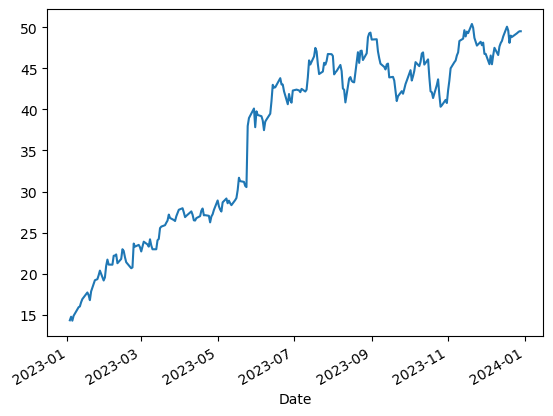

In [28]:
kapanis_deg.plot();

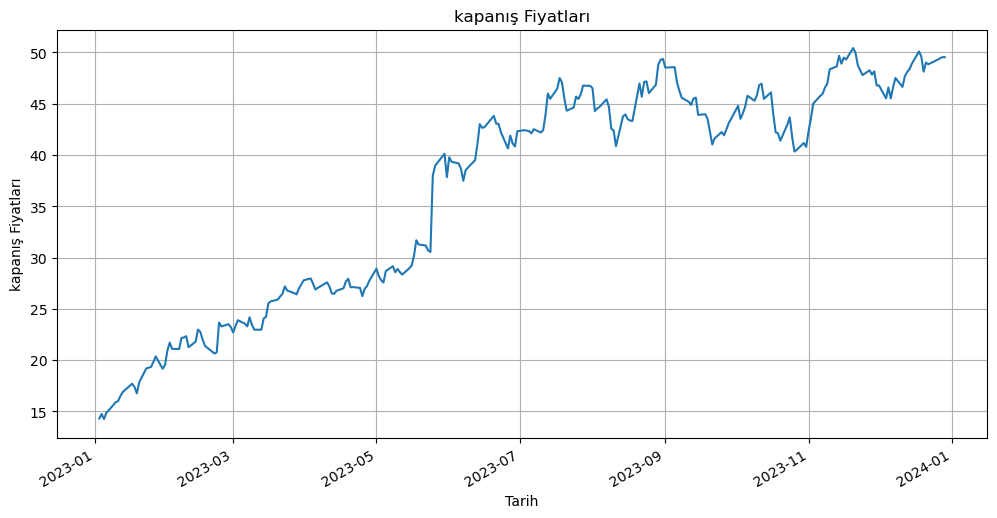

In [30]:
# Şimid basit şekilde fiyatları görselleştime.

kapanis_deg.plot(figsize=(12,6))
plt.title("kapanış Fiyatları")
plt.xlabel("Tarih")
plt.ylabel("kapanış Fiyatları")
plt.grid(True)
plt.show()

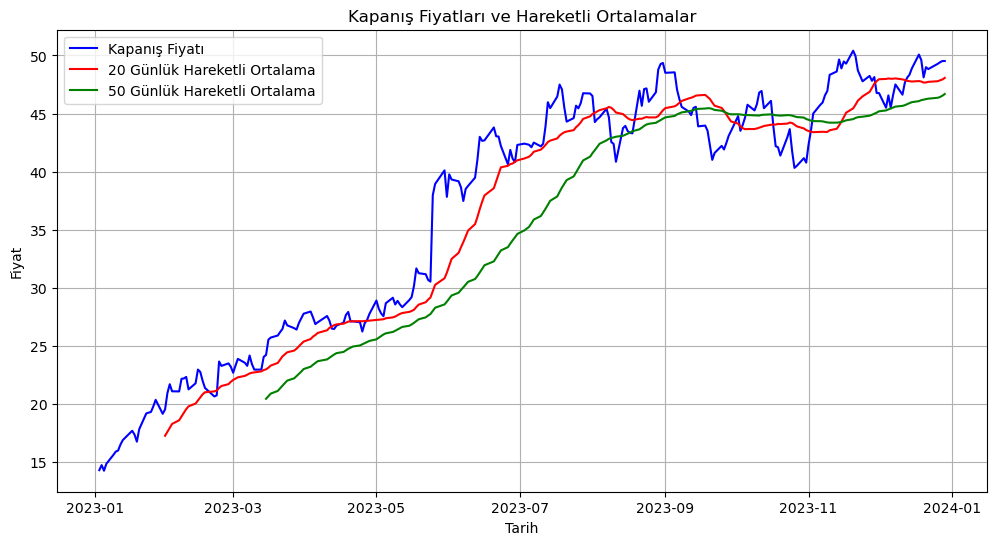

In [10]:
# Hareketli ortalamaları hesapla
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Hareketli ortalamalar ile kapanış fiyatlarını çiz
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Kapanış Fiyatı', color='blue')
plt.plot(df.index, df['MA20'], label='20 Günlük Hareketli Ortalama', color='red')
plt.plot(df.index, df['MA50'], label='50 Günlük Hareketli Ortalama', color='green')
plt.title('Kapanış Fiyatları ve Hareketli Ortalamalar')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.grid(True)
plt.show()

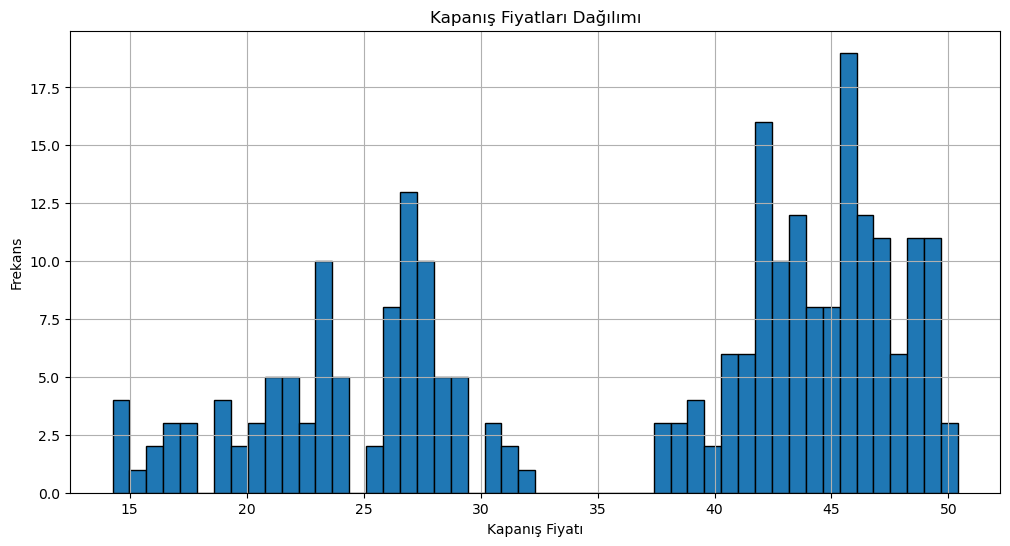

In [13]:
#  Zaman serisi ile görselleştirme yapmak.

plt.figure(figsize=(12,6))
plt.hist(df['Close'], bins = 50, edgecolor = 'k')
plt.title('Kapanış Fiyatları Dağılımı')
plt.xlabel('Kapanış Fiyatı')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

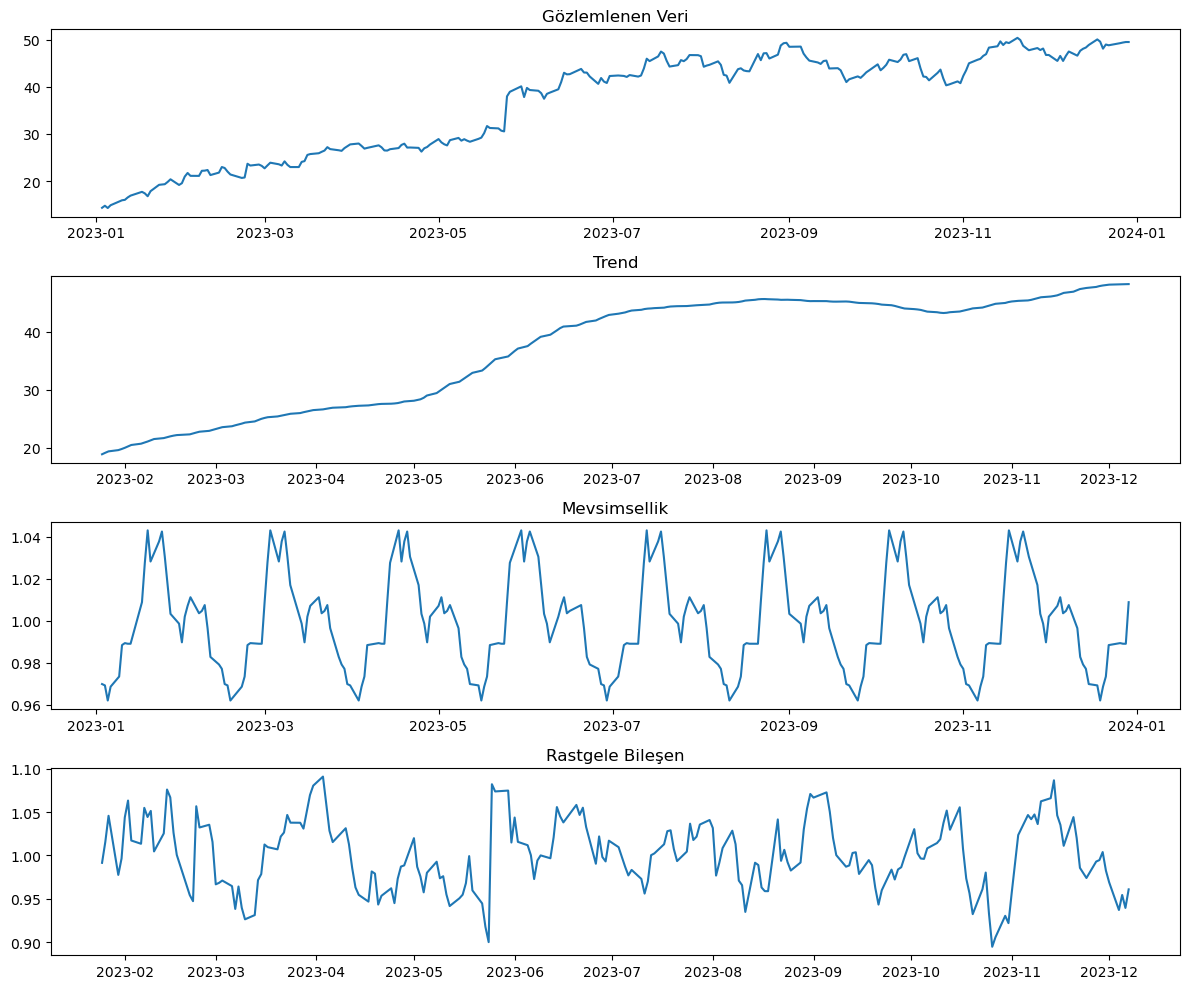

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Zaman serisini dekompoze et
result = seasonal_decompose(df['Close'], model='multiplicative', period=30)

# Trend, mevsimsellik ve rastgele bileşenleri çiz
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Gözlemlenen Veri')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Mevsimsellik')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Rastgele Bileşen')
plt.tight_layout()
plt.show()

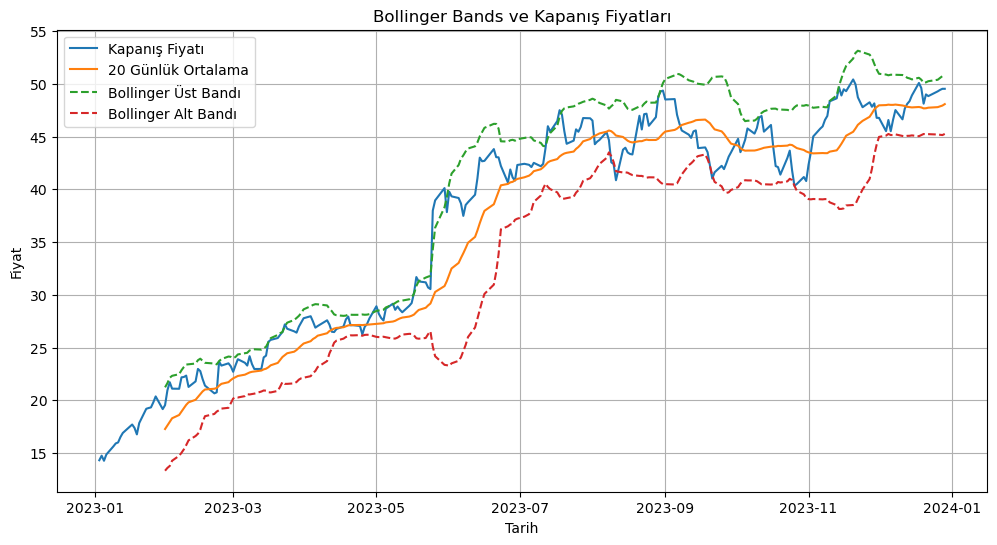

In [17]:
# Bollinger Bands hesapla
df['Rolling Mean'] = df['Close'].rolling(window=20).mean()
df['Bollinger High'] = df['Rolling Mean'] + 2 * df['Close'].rolling(window=20).std()
df['Bollinger Low'] = df['Rolling Mean'] - 2 * df['Close'].rolling(window=20).std()

# Bollinger Bands ile kapanış fiyatlarını çiz
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Kapanış Fiyatı')
plt.plot(df.index, df['Rolling Mean'], label='20 Günlük Ortalama')
plt.plot(df.index, df['Bollinger High'], label='Bollinger Üst Bandı', linestyle='--')
plt.plot(df.index, df['Bollinger Low'], label='Bollinger Alt Bandı', linestyle='--')
plt.title('Bollinger Bands ve Kapanış Fiyatları')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.grid(True)
plt.show()